# Part A

In [22]:
from pandas import Series, DataFrame
import pandas as pd
import nltk
import operator
import re,string
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## A1. What are the top 5 parts of speech in this corpus of job descriptions? How frequently do they appear?

### (1) import file

In [23]:
train = pd.read_csv('/Users/leeanthea/Documents/Train_rev1.csv')

train[:3]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk


### (2) tokenize the corpus

In [24]:
description  = train['FullDescription'][:100]

corpus = description.str.cat(sep=' ')

corpus = corpus.replace('****','')

corpus = corpus.decode('utf-8')

corpus_words = nltk.word_tokenize(corpus.lower())

### (3) Calculate the frequencies of PoS

In [25]:
pos = nltk.pos_tag(corpus_words)

pos[:10]

[(u'engineering', 'NN'),
 (u'systems', 'NNS'),
 (u'analyst', 'NN'),
 (u'dorking', 'VBG'),
 (u'surrey', 'NN'),
 (u'salary', 'NN'),
 (u'k', 'NN'),
 (u'our', 'PRP$'),
 (u'client', 'NN'),
 (u'is', 'VBZ')]

In [26]:
pos_freq = sorted(pos, key=lambda x: x[1],reverse=True)

df_pos = pd.DataFrame(pos_freq)


df_pos.columns = ['word','pos']

df_pos.groupby('pos').count().sort('word',ascending=False)[:5]

,word
pos,
NN,7328
IN,3002
JJ,2418
DT,2135
NNS,2118


## A2. Does this corpus support Zipf’s law? Plot the most common 100 words in the corpus against the theoretical prediction of the law.

### (1) Calculate the frequencies of words

In [27]:
fdist = nltk.FreqDist(corpus_words)

In [28]:
c_sorted = sorted(fdist.items(), key=operator.itemgetter(1),reverse=True)

df = pd.DataFrame.from_records(c_sorted)
df.columns = ['word','freq']
df[:10]

,word,freq
0,",",1193
1,and,1081
2,the,1001
3,.,928
4,to,816
5,a,676
6,of,646
7,in,502
8,for,408
9,you,364


### (2) Get rid of the punctuation marks and then rank 

In [29]:
mask = ~df['word'].isin(set(string.punctuation)) 

df = df[mask]

df['rank'] = df['freq'].rank(method='min',ascending=False)

In [30]:
df[:5][['word','freq','rank']]

,word,freq,rank
1,and,1081,1
2,the,1001,2
4,to,816,3
5,a,676,4
6,of,646,5


### (3) Plot the most common 100 words in the corpus against the theoretical prediction of the law

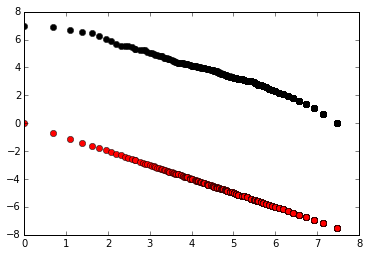

In [31]:
df['x^-1']= [c**-1 for c in df['rank']]

import matplotlib.pyplot as plt

fig = plt.figure()

ax = plt.plot([math.log(c) for c in df['rank'].values], [math.log(c) for c in df['freq']], 'ro',color='black')

ax2 = plt.plot([math.log(c) for c in df['rank'].values], [math.log(c) for c in df['x^-1']], 'ro')

## A3. If we remove stopwords and lemmatize the corpus, what are the 10 most common words? What is their frequency?

In [32]:
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer, WordNetLemmatizer

filtered_words_sw = [word for word in df['word'].values if word not in stopwords.words('english')]

wnl = WordNetLemmatizer()
words_lem = [wnl.lemmatize(word) for word in filtered_words_sw]

fdist_2 = nltk.FreqDist(words_lem)
fdist_2.most_common(10)

[(u'property', 3),
 (u'dynamic', 2),
 (u'venue', 2),
 (u'solution', 2),
 (u'chef', 2),
 (u'specification', 2),
 (u'supplier', 2),
 (u'specialist', 2),
 (u'study', 2),
 (u'call', 2)]